In [360]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from openpyxl import load_workbook

In [361]:
path = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\raw\H2_supply_route_assessment.xlsx'
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\interim'
path_plt = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\Plots'

In [362]:
# adjust plotsize and font
params = { 'font.size':11,
'font.weight':'normal',
'font.family':'arial',
'lines.linewidth':2
    }
plt.rcParams.update(params)

## Read inputs

In [363]:
prices = pd.read_excel(path, sheet_name='Commodity Prices', decimal=',', index_col=0)
prices

,Reference,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Electricity prices in Germany [€_2020/MWh],NaN,NaN,NaN,512.000000,104.000000,NaN,150.000000,133.200000,116.40000,99.600000,...,56.30000,55.60000,54.900000,54.20000,53.50000,52.800000,52.100000,51.400000,50.700000,50.000000
Electricity prices in Norway [€_2018/MWh],DNV Gl 2018,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.11822,45.738344,...,49.60933,50.70543,51.925184,53.19331,54.22122,54.704721,54.535295,53.994557,53.715329,53.994428
Electricity prices in Norway [€_2021/MWh],LMA 2021,31.000000,31.800000,32.600000,33.400000,34.200000,35.000000,39.400000,43.80000,48.200000,...,56.80000,54.60000,52.400000,50.20000,48.00000,45.800000,43.600000,41.400000,39.200000,37.000000
EU ETS [€_2020/t_CO2],NaN,25.000000,NaN,80.000000,NaN,NaN,88.000000,94.400000,100.80000,107.200000,...,194.20000,198.40000,202.600000,206.80000,211.00000,215.000000,219.000000,223.000000,227.000000,231.000000
CO2 prices global [USD_2021/t CO2],IEA WOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000000
Gas prices in Germany [€_2020/MWh],NaN,13.000000,12.000000,150.000000,300.000000,150.000000,70.000000,60.000000,50.00000,35.000000,...,35.00000,35.00000,35.000000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000
Gas prices in Canada [€_2020/MWh],https://www2.deloitte.com/content/dam/Deloitte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas prices EU USD_2021/MWh,IEA WOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000


In [364]:
GHG =  pd.read_excel(path, sheet_name='GHG Footprint', decimal=',', index_col=0)
GHG

,Value,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.592000,46.94400,31.296000,15.648000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.783673,6.91882,6.053968,5.189115,4.324263,3.45941,2.594558,1.729705,0.864853,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.499000,24.61800,23.737000,22.856000,21.975000,21.09400,20.213000,19.332000,18.451000,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hydrogen leakage,Predicted Emission Confidence level,Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2],0.092,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2] w/ recombination,0.0052,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
tea_blue = pd.read_excel(path, sheet_name='LCOH_NGR', decimal=',', index_col=0)
tea_blue

,Reference,NGR with CCS,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Parameter,,,,,,,,,,,,,,,,,,,,,
LHV H2 [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount rate [%],NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime [Years],IEA 2019,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capex [USD/kW],IEA 2019,1680.00,1596.000000,1565.600000,1535.200000,1504.800000,1474.400000,1444.000000,1413.600000,1383.200000,...,1259.228807,1257.067367,1255.013998,1253.063298,1251.210133,1249.449627,1247.777145,1246.188288,1244.678874,1216.000000
Capex [€/kW],IEA 2019,1495.20,1495.200000,1466.720000,1438.240000,1409.760000,1381.280000,1352.800000,1324.320000,1295.840000,...,1179.698567,1177.673638,1175.749956,1173.922459,1172.186336,1170.537019,1168.970168,1167.481659,1166.067577,1139.200000
Opex [€/kW/a],NaN,NaN,44.856000,44.001600,43.147200,42.292800,41.438400,40.584000,39.729600,38.875200,...,35.390957,35.330209,35.272499,35.217674,35.165590,35.116111,35.069105,35.024450,34.982027,34.176000
Opex [% of Capex],IEA 2019,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Efficiency [%],IEA 2019,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2 capture rate [%],IEA 2019,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
lcoh_green = pd.read_excel(path, sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


# Production emissions

## Definition of variables


In [367]:
# LHV H2 in moles per MJ
LHV_H2_moles_MJ = float(GHG.loc['H2 LHV [mole/MJ]']['Value'])
LHV_H2_moles_MJ

4.128787878787879

In [368]:
# CO2 produced during SMR @ 1 mole CO2 per 4 moles H2 [moles CO2/MJ]
CO2_SMR_mole = LHV_H2_moles_MJ * 1/4
CO2_SMR_mole

1.0321969696969697

In [369]:

# Molecular weight of CO2 [g/Mole]
CO2_g_mole = float(GHG.loc['CO2 [g/Mole]']['Value'])
CO2_g_mole

44.01

In [370]:
# Capture rate syngas [%] low
capture_rate_low = float(GHG.loc['Capture rate [%] low']['Value'])
capture_rate_low

0.55

In [371]:
# Capture rate syngas [%] mid
capture_rate_mid = float(GHG.loc['Capture rate [%] mid']['Value'])
capture_rate_mid

0.8

In [372]:
# Capture rate syngas [%] high
capture_rate_high = float(GHG.loc['Capture rate [%] high']['Value'])
capture_rate_high

0.95

In [373]:
# Molecular weight of CH4 [g/Mole]
CH4_g_mole = float(GHG.loc['CH4 [g/Mole]']['Value'])
CH4_g_mole

16.04

In [374]:
# Heat consumption to drive SMR in [MJ/mole_H2]
Drive_Energy_MJ_mole_h2 = float(GHG.loc['Heat Input [MJ/mole_H2]']['Value'])
Drive_Energy_MJ_mole_h2

0.1814

In [375]:
# Emission intensity of CH4 [g CO2/MJ]
emission_intensity_CH4 = float(GHG.loc['Combustion emissions CH4 [g CO2/MJ]']['Value'])
emission_intensity_CH4

56.0

In [376]:
# Flue gas capture rate [%] low
capture_rate_flue_gas_low = float(GHG.loc['Capture rate [%] flue gas low']['Value'])
capture_rate_flue_gas_low

0.65

In [377]:
# Flue gas capture rate [%] high
capture_rate_flue_gas_high = float(GHG.loc['Capture rate [%] flue gas high']['Value'])
capture_rate_flue_gas_high

0.9

In [378]:
#GWP20 of methane
GWP20_CH4 = float(GHG.loc['CH4 GWP20 [Years]']['Value'])
GWP20_CH4

86.0

In [379]:
#GWP100 of methane
GWP100_CH4 = float(GHG.loc['CH4 GWP100 [Years]']['Value'])
GWP100_CH4

30.0

In [380]:
# Methane leakage rate in %
leakage_rate_low = float(GHG.loc['Upstream methane leakage rate [%] low']['Value'])
leakage_rate_low

0.002

In [381]:
# Methane leakage rate in %
leakage_rate_mid = float(GHG.loc['Upstream methane leakage rate [%] mid']['Value'])
leakage_rate_mid

0.015

In [382]:
# Methane leakage rate in %
leakage_rate_high = float(GHG.loc['Upstream methane leakage rate [%] high']['Value'])
leakage_rate_high

0.08

## Direct emissions from SMR

In [383]:
# CO2 emissions from SMR process [g CO2/MJ]
Direct_emissions_grey = CO2_g_mole * CO2_SMR_mole
Direct_emissions_grey

45.42698863636364

In [384]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_low = Direct_emissions_grey * (1-capture_rate_low)
Direct_emissions_low

20.442144886363636

In [385]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_mid = Direct_emissions_grey * (1-capture_rate_mid)
Direct_emissions_mid

9.085397727272726

In [386]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_high = Direct_emissions_grey * (1-capture_rate_high)
Direct_emissions_high

2.271349431818184

In [387]:
#CH4 consumed during SMR @ 1 mole CH4 per 4 moles H2 [g CH4/MJ]
CH4_SMR_grams = 1.03 * CH4_g_mole
CH4_SMR_grams


16.5212

Emissions from energy to drive SMR

### w/o flue gas capture (Grey)

In [388]:
# When burning natural gas for heat production CO2 is emitted [CO2/mole_H2]
Drive_CO2_emissions_mole = Drive_Energy_MJ_mole_h2 * emission_intensity_CH4
Drive_CO2_emissions_mole

10.1584

In [389]:
# CO2 emissions per MJ hydrogen in order to create heat and pressure - w/o flue gas capture [g CO2/MJ_H2]
Drive_CO2_emissions_grams_grey = Drive_CO2_emissions_mole * LHV_H2_moles_MJ
Drive_CO2_emissions_grams_grey

41.94187878787879

### w/o flue gas capture (blue)

In [390]:
# CO2 emissions drive with flue gas capture - low [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_low = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_low)
Drive_CO2_emissions_grams_blue_flue_low

14.679657575757576

In [391]:
# CO2 emissions drive with flue gas capture - high [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_high = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)
Drive_CO2_emissions_grams_blue_flue_high

4.194187878787878

## Check this cell!!

In [392]:
# CH4 consumed to drive the process [g CH4/MJ_H2]
Drive_CH4_consumed = Drive_Energy_MJ_mole_h2 * 1/CO2_g_mole * CH4_g_mole
Drive_CH4_consumed

0.06611351965462395

## Total direct CO2 emissions

### Without flue gas capture

In [393]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_grey = Direct_emissions_grey + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_grey

87.36886742424244

In [394]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_no_fluegas = Direct_emissions_low + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_low_no_fluegas

62.38402367424243

In [395]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_no_fluegas = Direct_emissions_mid + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_mid_no_fluegas

51.02727651515152

In [396]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_no_fluegas = Direct_emissions_high + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_high_no_fluegas

44.21322821969698

### With flue gas capture

#### low (65%)

In [397]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_low = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_low_with_fluegas_low

35.12180246212121

In [398]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_low = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_mid_with_fluegas_low

23.7650553030303

In [399]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_low = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_high_with_fluegas_low

16.95100700757576

#### high (90%)

In [400]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_high = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_low_with_fluegas_high

24.636332765151515

In [401]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_high = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_mid_with_fluegas_high

13.279585606060603

In [402]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_high = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_high_with_fluegas_high

6.465537310606063

### Indirect emissions from natural gas transport and storage

In [403]:
# Indirect emissions from natural gas transport and storage [g CO2/MJ_H2]
Indirect_emissions = Total_CO2_emissions_grey * 0.075
Indirect_emissions

6.552665056818182

## CH4 upstream emissions

In [404]:
# CH4 consumption as feedstock and energy to drive SMR [g CH4/MJ_H2]
Total_methane_SMR = CH4_SMR_grams + Drive_CH4_consumed
Total_methane_SMR

16.587313519654625

In [405]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_low = leakage_rate_low * Total_methane_SMR
upstream_emissions_CH4_low

0.03317462703930925

In [406]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_mid = leakage_rate_mid * Total_methane_SMR
upstream_emissions_CH4_mid

0.24880970279481937

In [407]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_high = leakage_rate_high * Total_methane_SMR
upstream_emissions_CH4_high

1.32698508157237

In [408]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_low = upstream_emissions_CH4_low * GWP20_CH4
upstream_emissions_GWP20_low = leakage_rate_low * Total_methane_SMR * GWP20_CH4


In [409]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_mid = upstream_emissions_CH4_mid * GWP20_CH4
upstream_emissions_GWP20_mid

21.397634440354466

In [410]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_high = upstream_emissions_CH4_high * GWP20_CH4
upstream_emissions_GWP20_high

114.12071701522382

In [411]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_low = upstream_emissions_CH4_low * GWP100_CH4
upstream_emissions_GWP100_low

0.9952388111792775

In [412]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_mid = upstream_emissions_CH4_mid * GWP100_CH4
upstream_emissions_GWP100_mid

7.464291083844581

In [413]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_high = upstream_emissions_CH4_high * GWP100_CH4
upstream_emissions_GWP100_high

39.8095524471711

## Total emissions

In [414]:
# Total CO2 emissions including indirect emissions from natural gas transport and storage
Total_CO2_emissions = Total_CO2_emissions_grey + Indirect_emissions
Total_CO2_emissions

93.92153248106062

### w/o flue gas capture

#### @ GWP20

In [415]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [416]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid


115.31916692141509

In [417]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

#### @ GWP100

In [418]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_low = Total_CO2_emissions + upstream_emissions_GWP100_low
Total_emissions_grey_GWP100_low

94.9167712922399

In [419]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_mid = Total_CO2_emissions + upstream_emissions_GWP100_mid
Total_emissions_grey_GWP100_mid

101.38582356490521

In [420]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_high = Total_CO2_emissions + upstream_emissions_GWP100_high
Total_emissions_grey_GWP100_high

133.73108492823172

### w/ flue gas capture

#### @GWP20

In [421]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [422]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid

115.31916692141509

In [423]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

### Energy to power carbon capture

In [424]:
## xx none according to Bauer et al.


flue gas capture (FGC)

In [425]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

In [426]:
Direct_emissions = [Direct_emissions_grey, Direct_emissions_grey, Direct_emissions_low, Direct_emissions_low, Direct_emissions_mid, Direct_emissions_mid, Direct_emissions_high, Direct_emissions_high]

Drive_emissions_plt = [Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_high, Drive_CO2_emissions_grams_blue_flue_high]

Indirect_emissions_plt = [Indirect_emissions] * 8

Upstream_emissions = [upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low]

### Calc. total emissions for each case

In [427]:
Grey_GWP100 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP100_low
Grey_GWP100

94.9167712922399

In [428]:
Grey_GWP20 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
Grey_GWP20

96.77455040644122

In [429]:
pess = Direct_emissions_low + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
pess

71.78970665644121

In [430]:
opt = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high + Indirect_emissions + upstream_emissions_GWP20_low
opt

15.87122029280484

### Plot total emissions

In [431]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

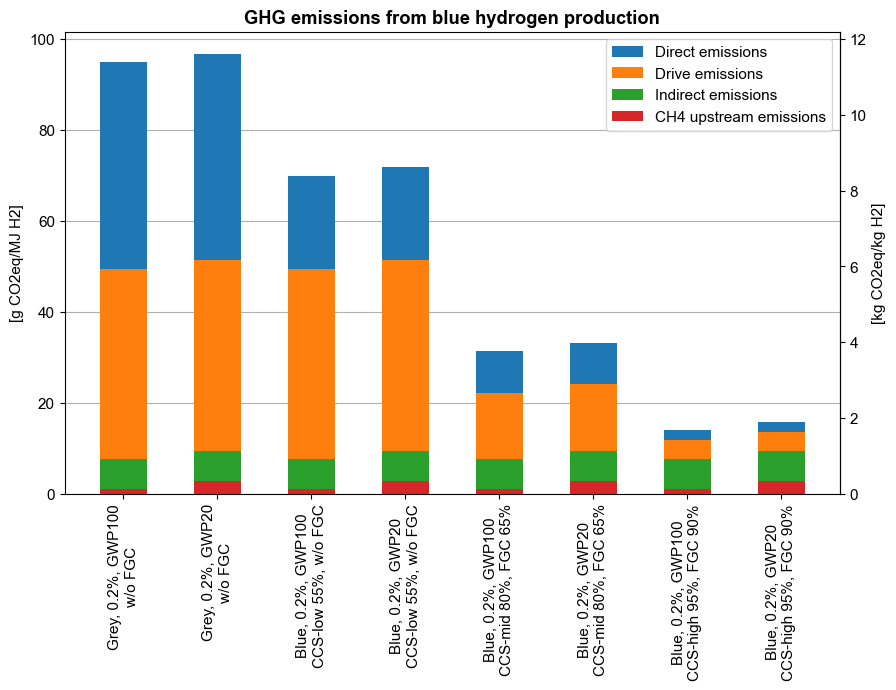

In [432]:
# Creating a stacked bar chart to display emissions. Adding lists for the bottom method.
fig, ax = plt.subplots(figsize=(10,6))

width = 0.5
#y_axis = np.arange(101,step=10)
direct = plt.bar(x, Direct_emissions, width, label='Direct emissions', bottom=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.bar(x, Drive_emissions_plt, width, label='Drive emissions', bottom=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.bar(x, Indirect_emissions, width, label = 'Indirect emissions', bottom=Upstream_emissions)
upstream = plt.bar(x, Upstream_emissions, width, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'y')
ax.set_ylabel(ylabel= ('[g CO2eq/MJ H2]'))
ax.set_axisbelow(True)
ax2= ax.secondary_yaxis('right', functions=(lambda MJ: MJ*120/1000, lambda kg: kg/120))
ax2.set_ylabel(ylabel= '[kg CO2eq/kg H2]')
#ax.twinx()
plt.xticks(rotation = 90)
plt.locator_params(axis='y', nbins=6)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production', fontweight = 'bold')


title = '\Blue_emission_breakdown'

plt.savefig(path_plt + title + '.png', transparent=True)
#ax.set_ylabel('kg CO2/kg H2')

Interpolated blue hydrogen production emissions starting from 55% total system capture rate -> up to 81%

## Sensitivity analysis

### Leakage rate

In [433]:
leakage_rate = np.arange(0,0.105,0.005)
sensitivity = []
# calculate emissions from blue hydrogen production in [g CO2eq/MJ H2]
def blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4):

    for i in leakage_rate:
        result = (Direct_emissions_grey * (1 - capture_rate_high)) + (Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)) + Indirect_emissions + i * Total_methane_SMR * GWP20_CH4

        sensitivity.append(result)


    return sensitivity

In [434]:
blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4)

[13.018202367424244,
 20.150747180875733,
 27.28329199432722,
 34.41583680777871,
 41.5483816212302,
 48.68092643468169,
 55.813471248133176,
 62.94601606158467,
 70.07856087503615,
 77.21110568848763,
 84.34365050193912,
 91.47619531539061,
 98.6087401288421,
 105.74128494229362,
 112.8738297557451,
 120.00637456919657,
 127.13891938264806,
 134.27146419609957,
 141.40400900955103,
 148.53655382300252,
 155.669098636454]

In [435]:
leakage_sensi_GWP20 = pd.DataFrame(sensitivity, index=leakage_rate, columns=['Total_Emissions [g CO2eq/MJ H2]'])
leakage_sensi_GWP20

,Total_Emissions [g CO2eq/MJ H2]
0.000,13.018202
0.005,20.150747
0.010,27.283292
0.015,34.415837
0.020,41.548382
0.025,48.680926
0.030,55.813471
0.035,62.946016
0.040,70.078561
0.045,77.211106


In [436]:
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\interim'
title = leakage_sensi_GWP20
output_file = os.path.join(path_csv,'leakage_sensi_GWP20.csv')
leakage_sensi_GWP20.to_csv(output_file, sep = ';')

In [437]:
# calculate emissions from blue hydrogen production in [g CO2eq/MJ H2]
sensitivity = []
def blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4):

    for i in leakage_rate:
        result = (Direct_emissions_grey * (1 - capture_rate_high)) + (Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)) + Indirect_emissions + i * Total_methane_SMR * GWP100_CH4

        sensitivity.append(result)


    return sensitivity

In [438]:
blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4)

[13.018202367424244,
 15.506299395372437,
 17.99439642332063,
 20.482493451268827,
 22.97059047921702,
 25.458687507165212,
 27.94678453511341,
 30.4348815630616,
 32.922978591009795,
 35.41107561895799,
 37.89917264690618,
 40.38726967485438,
 42.875366702802566,
 45.363463730750766,
 47.85156075869896,
 50.33965778664715,
 52.827754814595345,
 55.315851842543545,
 57.80394887049173,
 60.29204589843992,
 62.780142926388116]

In [439]:
leakage_sensi_GWP100 = pd.DataFrame(sensitivity, index=leakage_rate, columns=['Total_Emissions [g CO2eq/MJ H2]'])
leakage_sensi_GWP100

,Total_Emissions [g CO2eq/MJ H2]
0.000,13.018202
0.005,15.506299
0.010,17.994396
0.015,20.482493
0.020,22.970590
0.025,25.458688
0.030,27.946785
0.035,30.434882
0.040,32.922979
0.045,35.411076


In [440]:
# Create csv file from results dataframe

output_file = os.path.join(path_csv, 'leakage_sensi_GWP100' + '.csv')
leakage_sensi_GWP100.to_csv(output_file, sep = ';')

### Capture rate

In [441]:
capture_rate = np.arange(0.55, 1, 0.05)
sensitivity = []
# calculate emissions from blue hydrogen production in [g CO2eq/MJ H2]
def blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4):

    for i in capture_rate:

        result = (Direct_emissions_grey * (1-i)) + (Drive_CO2_emissions_grams_grey * (1 - i)) + Indirect_emissions + \
             leakage_rate_low * Total_methane_SMR * GWP20_CH4

        sensitivity.append(result)

    return sensitivity

In [442]:
blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4)

[48.72167332310787,
 44.35322995189575,
 39.984786580683625,
 35.616343209471495,
 31.247899838259364,
 26.87945646704724,
 22.511013095835114,
 18.142569724622987,
 13.774126353410864]

In [443]:
capture_sensi = pd.DataFrame(sensitivity, index=capture_rate, columns=['Total_Emissions [g CO2eq/MJ H2]'])
capture_sensi

,Total_Emissions [g CO2eq/MJ H2]
0.55,48.721673
0.60,44.353230
0.65,39.984787
0.70,35.616343
0.75,31.247900
0.80,26.879456
0.85,22.511013
0.90,18.142570
0.95,13.774126


In [444]:
capture_sensi.to_csv('capture_sensi.csv', sep = ';')

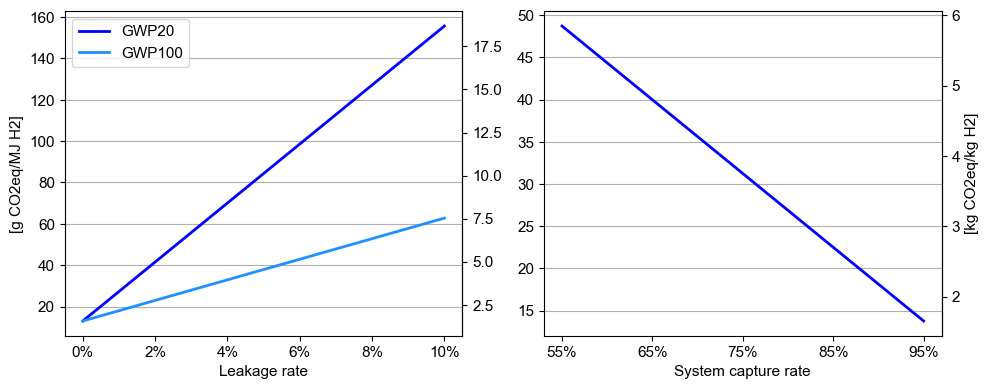

In [445]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1, 2, 1)
#plt.subplot(1,2,1)
ax2 = ax.secondary_yaxis('right', functions=(lambda MJ: MJ*120/1000, lambda kg: kg/120))
#ax2.set_ylabel(ylabel= '[kg CO2eq/kg H2]')
plt.locator_params(axis='y', nbins=10)
plt.plot(leakage_sensi_GWP20, color='blue', linestyle='solid', label = 'GWP20' )
plt.plot(leakage_sensi_GWP100, color='dodgerblue',linestyle='-', label = 'GWP100')

plt.grid(True, axis='y')
ax.set_axisbelow(True)


plt.xticks(np.arange(0,0.105, 0.02), ['0%', '2%', '4%', '6%', '8%', '10%'] )

plt.ylabel('[g CO2eq/MJ H2]')
plt.xlabel('Leakage rate')
plt.legend()

#Capture rates
ax3 = fig.add_subplot(1, 2, 2)
ax4 = ax3.secondary_yaxis('right', functions=(lambda MJ: MJ*120/1000, lambda kg: kg/120))
ax4.set_ylabel(ylabel= '[kg CO2eq/kg H2]')

plt.plot(capture_sensi, color='blue', linestyle='solid')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
#ax.secondary_yaxis('right', functions=(lambda MJ: MJ*120/1000, lambda kg: kg/120), label= '[kg CO2eq/kg H2]')
#secax.set_ylabel = ('[g CO2eq/g H2]')
#plt.ylabel('[g CO2eq/MJ H2]')
plt.xlabel('System capture rate')

#ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=None))
plt.xticks(np.arange(0.55,1, 0.1), ['55%',  '65%',  '75%',  '85%',  '95%'] )





plt.locator_params(axis='y', nbins=10)
fig.tight_layout(pad=1)
title = 'Leakage_and_capture_sensi'

plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()

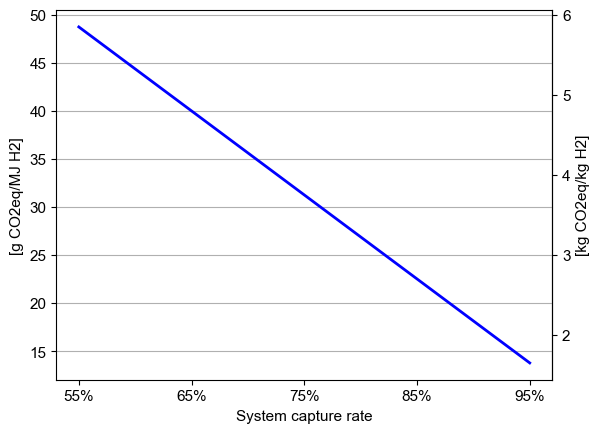

In [446]:
fig, ax = plt.subplots()
plt.plot(capture_sensi, color='blue', linestyle='solid')
plt.grid(True, axis='y')
ax.set_axisbelow(True)

ax2 = ax.secondary_yaxis('right', functions=(lambda MJ: MJ*120/1000, lambda kg: kg/120))
ax2.set_ylabel(ylabel= '[kg CO2eq/kg H2]')
plt.ylabel('[g CO2eq/MJ H2]')
plt.xlabel('System capture rate')

plt.xticks(np.arange(0.55,1, 0.1), ['55%',  '65%',  '75%',  '85%',  '95%'] )


title = '\Capture_sensi'
plt.savefig(path_plt+title+'.png', transparent = True)
plt.show()

In [447]:
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\interim'
output_file = os.path.join(path_csv,title)
leakage_sensi_GWP20.to_csv(output_file, sep = ';')

PermissionError: [Errno 13] Permission denied: '\\\\dena.de\\Daten\\Capture_sensi'

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'leakage_sensi.csv')
result.to_csv(output_file, sep = ';')

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
#writer.book = book
#writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Sensitivity Results']

leakage_sensi.to_excel(writer, sheet_name='Sensitivity Results', index=True, startcol=ws.max_column)
book.save(path)
book.close()

# Production cost

In [ ]:
lowest_green = ((lcoh_green.loc['Norway_Onshore_2_low_temp_optimistic', 2025:2050]).mul(0.89))

In [ ]:
lowest_green = pd.DataFrame(lowest_green)
lowest_green.index.name = 'Years'
lowest_green

In [ ]:
# Interest rate (WACC) in %
i = float(tea_blue.loc['Discount rate [%]']['NGR with CCS'])
i

In [ ]:
# Economic lifetime of the plant in years
l_ngr = float(tea_blue.loc['Lifetime [Years]']['NGR with CCS'])
l_ngr

In [ ]:
opex_share = float(tea_blue.loc['Opex [% of Capex]']['NGR with CCS'])
opex_share

In [ ]:
# Calculate the amortisation factor alpha
alpha_ngr = (i * (1 + i) ** l_ngr) / (1 + i) ** (l_ngr - 1)
alpha_ngr
#round(alpha, 2)

In [ ]:
CF = float(tea_blue.loc['Availability [%]']['NGR with CCS'])
CF

In [ ]:
# Plant efficiency in %
n = float(tea_blue.loc['Efficiency [%]']['NGR with CCS'])
n

In [ ]:
# P_ccs is the cost for transporting and storing CO2 in $/t_co2
P_ccs = float(tea_blue.loc['CO2 transport and storage cost [€/t CO2]']['NGR with CCS'])
P_ccs

In [ ]:
# LHV of hydrogen is 33.33 kWh/kg
LHV_h2 = float(tea_blue.loc['LHV H2 [kWh/kg]']['NGR with CCS'])
LHV_h2

## Calc. blue LCOH

Definition of the cost calculation function for LCOH from NGR. Time relevant variables = capex, opex, P_ng, P_co2
LHV H2 [kWh/kg]
capex_y  [€/kW]
opex_y [€/kW/a]
CF [%]
P_ng_y [€/MWh]
Q_ce [kgCO2/kgH2]
Q_ue [kgCO2/kgH2]
P_ccs [€/t CO2]
P_co2_y [€/t CO2]


In [ ]:
def calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng_y, n, Q_ce_y, P_ccs, Q_ue_y, P_co2_y, LHV_h2):

    result = float(LHV_h2 * ((alpha * capex_y + opex_y) / (CF * 8760) + P_ng_y / 1000 * n) + (Q_ce_y * P_ccs + Q_ue_y * P_co2_y) / 1000)

    return result

In [ ]:
# Calculation of LCOH from NGR for every year from 2025 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LCOH_BLUE'])
result.index.name = 'Years'


for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_y = float(tea_blue.loc['Capex [€/kW]'][year])
    opex_y = capex_y * opex_share
    Q_ce_y = float(GHG.loc['Captured emissions [kg CO2/kg H2]'][year])
    Q_ue_y = float(GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway'][year])
    P_ng_y = float(prices.loc['Gas prices in Germany [€_2020/MWh]'][year])
    P_co2_y = float(prices.loc['EU ETS [€_2020/t_CO2]'][year])

    # calculate lcoe of specific year
    result.LCOH_BLUE.loc[year] = calculate_lcoh_ngr(alpha=alpha_ngr, capex_y=capex_y, opex_y=opex_y, CF=CF, P_ng_y=P_ng_y,
                                              n=n, Q_ce_y=Q_ce_y, P_ccs=P_ccs, Q_ue_y=Q_ue_y, P_co2_y=P_co2_y, LHV_h2=LHV_h2)

result

In [ ]:
LCOH_BLUE = result
LCOH_BLUE

In [ ]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'blue', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for blue hydrogen production', fontweight='bold')
#plt.xlabel('Year')
plt.ylabel('[€/kg H2]')
plt.show()

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'LCOH_NGR.csv')
result.to_csv(output_file, sep = ';')

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Results']

result.to_excel(writer, sheet_name='Reference Results', index=True, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

## Green LCOH

In [ ]:
# LCOH from RES in €_2019/kg H2 from EWI 2019 [$_2019/kg H2]
green_off1_opt_lowtemp = (lcoh_green.loc['Norway_Offshore_1_low_temp_optimistic', 2025:2050]).mul(0.89)
green_off1_opt_lowtemp

In [ ]:
# Plot cost curve of hydrogen production from RES
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(green_off1_opt_lowtemp, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for green hydrogen production', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost [€/kg H2]')

title = '\LCOH_green'
plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()

## Green and blue


In [ ]:
LCOH_green = ((lcoh_green.loc['Norway_Onshore_2_low_temp_optimistic', 2025:2050]).mul(0.89))

LCOH_green = pd.DataFrame(LCOH_green)
LCOH_green.index.name = 'Years'
LCOH_green

In [ ]:
LCOH_green=(lcoh_green.loc['Norway_Onshore_1_low_temp_optimistic', 2025:2050]).mul(0.89)
LCOH_gre = pd.DataFrame(LCOH_green, index = np.arange(2025, 2051), columns=['LCOH_green [€/kg H2]'])
#LCOH_green.index.name = 'Years'
LCOH_gre

In [ ]:
# Plot cost curves of hydrogen production from NGR with CCS and RES
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'blue', linestyle = 'solid', label='Blue hydrogen')
plt.plot(lowest_green, color = 'green', linestyle = 'solid', label='Green hydrogen')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curves for green and blue hydrogen production', fontweight='bold')
ax.legend()
plt.xlabel('Year')
#plt.ylim(0)
plt.ylabel('Cost [€/kg H2]')
plt.show()

## Sensitivity analysis

In [ ]:
year = 2050

capex_y = float(tea_blue.loc['Capex [€/kW]'][year])
opex_y = capex_y * opex_share
Q_ce_y = float(GHG.loc['Captured emissions [kg CO2/kg H2]'][year])
Q_ue_y = float(GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway'][year])
P_ng_y = float(prices.loc['Gas prices in Germany [€_2020/MWh]'][year])
P_co2_y = float(prices.loc['EU ETS [€_2020/t_CO2]'][year])

In [ ]:
gas_prices = np.arange(10,100,5)


In [ ]:
sensitivity = []

def calculate_lcoh_ngr_sensi(alpha_ngr, capex_y, opex_y, CF, P_ng_y, n, Q_ce_y, P_ccs, Q_ue_y, P_co2_y, LHV_h2):

    for x in range(21):
        factor = x/10

        result = float(LHV_h2 * ((alpha_ngr * capex_y + opex_y) / (CF * 8760)+ P_ng_y / 1000 * n) + (Q_ce_y * P_ccs * factor + Q_ue_y * P_co2_y ) / 1000)

        sensitivity.append(result)


    return sensitivity

In [ ]:
calculate_lcoh_ngr_sensi(alpha_ngr, capex_y, opex_y, CF, P_ng_y, n, Q_ce_y, P_ccs, Q_ue_y, P_co2_y, LHV_h2)

In [ ]:
lcoh_ngr_sensi_P_CCS= pd.DataFrame(sensitivity, index= range(21), columns=['LCOH_NGR [€/kg H2]'])
lcoh_ngr_sensi_P_CCS.index.name = 'CCS_price_change in %'

In [ ]:
lcoh_ngr_sensi_P_CCS

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lcoh_ngr_sensi_P_CCS_.csv')
lcoh_ngr_sensi_P_CCS.to_csv(output_file, sep = ';')

In [ ]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(5,4))
#plt.subplot(1,2,1)


plt.plot(lcoh_ngr_sensi, color='blue', linestyle='solid', label = 'Gas price')
plt.plot(lcoh_ngr_sensi_P_Co2, color='dodgerblue',linestyle='-', label = 'CO2 price')
plt.plot(lcoh_ngr_sensi_P_CCS, color='royalblue',linestyle='-', label = 'CCS cost')
plt.grid(True, axis='y')
plt.grid(True, axis='x')
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(10, decimals=None))
plt.locator_params(axis='x', nbins=5)
plt.ylabel('[€/kg H2]')
plt.xlabel('Change')
plt.legend()



title = 'LCOH_ngr_sensi'
output_file = os.path.join(path_plt,title)
plt.savefig(output_file+'.png', transparent = True)

plt.show()


In [ ]:

plt.ylabel('[€/kg H2]')
plt.xlabel('Gas price change')
#plt.legend()

#Capture rates
plt.subplot(1,2,2)
plt.plot(capture_sensi, color='blue', linestyle='solid')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.ylabel('[g CO2eq/MJ H2]')
plt.xlabel('System capture rate'           )
#plt.xticks(np.arange(0.55,0.95, 0.1), ['55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%'] )
plt.xticks(np.arange(0.55,1, 0.1), ['55%',  '65%',  '75%',  '85%',  '95%'] )

# Transport cost

In [ ]:
#Definition of variables for pipeline transport costs
tea_pipe = pd.read_excel(path, sheet_name='Pipeline Transport', decimal=',', index_col=0)
tea_pipe

In [ ]:
tra_d = pd.read_excel(path, sheet_name='Transport Distances', decimal=',')
tra_d

In [ ]:
el_price = pd.read_excel(path, sheet_name= 'Commodity Prices', index_col=0, decimal=',')
el_price

In [ ]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_pipe.loc['Discount rate [%]']['Parameter'])
i_tra

In [ ]:
i = i_tra

## Pipeline

In [ ]:


# Economic lifetime for pipelines
l_pipe = float(tea_pipe.loc['Lifetime [Years]']['Parameter'])
l_pipe
# Amortisation factor for onshore pipelines
alpha = (i_tra * (1 + i_tra) ** l_pipe) / (((1 + i_tra) ** l_pipe) - 1)
alpha
# Utilisation of the pipeline in %
pipe_use = float(tea_pipe.loc['Pipeline load factor [%]']['Parameter'])
pipe_use
# Pipeline Opex [€/a as % of Capex]
pipe_opex_share = float(tea_pipe.loc['Pipeline Opex [€/a as % of Capex]']['Parameter'])
pipe_opex_share
# Compression Opex [€/a as % of Capex]
comp_opex_share = float(tea_pipe.loc['Compressor Opex [€/a as % of Capex]']['Parameter'])
comp_opex_share
# New pipeline


### New offshore pipeline

In [ ]:
# Pipeline capex offshore new [€/kg/1000km]
capex_pipe_new_off_EHB = float(
    tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_new_off_EHB
# Compression capex offshore new [€/kg/1000km]
capex_comp_new_off_EHB = float(
    tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_new_off_EHB
capex_new_off = capex_pipe_new_off_EHB + capex_comp_new_off_EHB
capex_new_off
opex_new_off = capex_pipe_new_off_EHB * pipe_opex_share + capex_comp_new_off_EHB * comp_opex_share
opex_new_off
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                 'onshore distance (km)'].values)
d_on
#not used here
off_factor = float(tea_pipe.loc['Offshore Capex cost factor ']['Parameter'])
off_factor
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                  'offshore distance (km)'].values)
d_off

### Electricity cost of compression

In [ ]:
# Compression capacity in [MWel/1000km]
capa_comp = float(tea_pipe.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp
# Load factor in hours/day
lf_comp = float(tea_pipe.loc['Assumed load factor for compressor electricity consumption [h/a]']['Parameter'])
lf_comp
#Capacity at full load factor [kg H2/a]
capa_pipe = float(tea_pipe.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe
# Electricity cost for compression [€/kg/1000km]
comp_el_cost = capa_comp * pipe_use * 8760 * p_el_y / capa_pipe
comp_el_cost

## Calc. offshore new pipeline cost

In [ ]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_off_pipe_new():

    result = ((alpha * capex_new_off / pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off / 1000

    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['New_Pipeline_costs_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    result.New_Pipeline_costs_off.loc[year] = calculate_off_pipe_new()

result

In [ ]:
New_Pipeline_costs_off = result

## Sensitivity

### Electricity price sensi

In [ ]:
year = 2030
p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])


In [ ]:
P_el_sensi = np.arange(0,121,10)
sensitivity = []

def calculate_off_pipe_retrofit_sensi():
    for p_el_y in P_el_sensi:

        result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000

        sensitivity.append(result)

    return sensitivity

In [ ]:
calculate_off_pipe_retrofit_sensi()

In [ ]:
retro_pipe_sensi_P_el = pd.DataFrame(sensitivity, P_el_sensi, columns=['Retrofit pipeline transport costs [€/kg H2]'])
retro_pipe_sensi_P_el.index.name = 'Electricity Price [€/MWh]'
retro_pipe_sensi_P_el

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'retro_pipe_sensi_P_el.csv')
retro_pipe_sensi_P_el.to_csv(output_file, sep=';')

### Transport distance sensi

In [ ]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []
def calculate_off_pipe_retrofit_sensi_distance():
    for d_off in transport_distance:

        result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000

        sensitivity.append(result)

    return sensitivity

In [ ]:
calculate_off_pipe_retrofit_sensi_distance()

In [ ]:
retro_pipe_sensi_distance = pd.DataFrame(sensitivity, transport_distance, columns=['Retrofit pipeline transport costs [€/kg H2]'])
retro_pipe_sensi_distance.index.name = 'Transport distance in km'
retro_pipe_sensi_distance

## Retrofit offshore pipeline cost

In [ ]:
#Retrofit  capex in [€/kg/100km]
capex_pipe_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_retrofit_off_EHB

In [ ]:
#Compression capex in [€/kg/100km]
capex_comp_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_retrofit_off_EHB

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'retro_pipe_sensi_distance.csv')
retro_pipe_sensi_distance.to_csv(output_file, sep=';')

In [ ]:
capex_retrofit_off = capex_pipe_retrofit_off_EHB + capex_comp_retrofit_off_EHB
capex_retrofit_off

In [ ]:
opex_retrofit_off = capex_pipe_retrofit_off_EHB * pipe_opex_share + capex_comp_retrofit_off_EHB * comp_opex_share
opex_retrofit_off

### Calc. offshore retrofit pipeline costs

In [ ]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_off_pipe_retrofit():
    result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (
                capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000
    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Retrofit_pipeline_costs_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    result.Retrofit_pipeline_costs_off.loc[year] = calculate_off_pipe_retrofit()

result

In [ ]:
Retrofit_pipeline_costs_off = result

### Sensitivity
#### Electricity price sensi

In [ ]:
year = 2030
#p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

In [ ]:
P_el_sensi = np.arange(0,121,10)
sensitivity = []

def calculate_off_pipe_new_sensi_P_el():
    for p_el_y in P_el_sensi:


        result = ((alpha * capex_new_off / pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off / 1000

        sensitivity.append(result)

    return sensitivity

In [ ]:
calculate_off_pipe_new_sensi_P_el()

In [ ]:
new_pipe_sensi_P_el = pd.DataFrame(sensitivity, P_el_sensi, columns=['New pipeline transport costs [€/kg H2]'])
new_pipe_sensi_P_el.index.name = 'Electricity price [€/MWh]'
new_pipe_sensi_P_el

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'new_pipe_sensi_P_el.csv')
new_pipe_sensi_P_el.to_csv(output_file, sep=';')

#### Transport distance sensi

In [ ]:
year = 2030
p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

In [ ]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []
def calculate_off_pipe_retrofit_sensi_distance():
    for d_off in transport_distance:

        result = ((alpha * capex_new_off / pipe_use + opex_new_off)
                  + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off / 1000

        #result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000
        sensitivity.append(result)

    return sensitivity

In [ ]:
calculate_off_pipe_retrofit_sensi_distance()

In [ ]:
new_pipe_sensi_distance = pd.DataFrame(sensitivity, transport_distance, columns=['New pipeline transport costs [€/kg H2]'])
new_pipe_sensi_distance.index.name = 'Transport distance in km'
new_pipe_sensi_distance

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'new_pipe_sensi_distance.csv')
new_pipe_sensi_distance.to_csv(output_file, sep=';')

## LH2 transport

In [ ]:
tea_lh2 = pd.read_excel(path, sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

### Liquefaction

In [ ]:
# WACC for liquefaction plant in %
i_liq = float(tea_lh2.loc['Liquefaction - Discount rate [%]']['LH2'])
i_liq

In [ ]:
# Economic lifetime for the liquefaction plant [years]
l_liq = float(tea_lh2.loc['Liquefaction - Lifetime [Years]']['LH2'])
l_liq

In [ ]:
# Amortisation factor alpha for the liquefaction plant
alpha_liq = (i_liq * (1 + i_liq) ** l_liq) /(((1 + i_liq) ** l_liq) - 1)
alpha_liq


In [ ]:
opex_liq_share = float(tea_lh2.loc['Liquefaction - Opex opt. [% of Capex]']['LH2'])
opex_liq_share

Calc. liquefaction cost

In [ ]:
# Definition of the cost calculation function for liquefaction costs. Time relevant variables = capex [€/tpa], opex [€/tpa], electricity use [kwh/kg H2], electricity price [$/MWh]
def calculate_liq_costs(alpha_liq, capex_liq_y, opex_liq_y, el_liq_y, p_el_y):

    result = float((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y*0.89/1000)

    return result

In [ ]:
# Calculation of liquefaction costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LH2_Liquefaction_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/t/a]'][year])
    opex_liq_y = capex_liq_y * opex_liq_share
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    # calculate costs of specific year
    result.LH2_Liquefaction_costs.loc[year] = calculate_liq_costs(alpha_liq=alpha_liq, capex_liq_y=capex_liq_y, opex_liq_y=opex_liq_y, el_liq_y=el_liq_y, p_el_y=p_el_y)

result

In [ ]:
LH2_Liquefaction_costs = result

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'LH2_Liquefaction_costs.csv')
result.to_csv(output_file, sep = ';')

Plot liquefaction costs

In [ ]:
# Plot cost curve for liquefaction
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'cyan', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for liquefaction', fontweight = 'bold')
plt.legend(['Liquefaction costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [€/kg_H2]')
plt.show()

### Export terminal

In [ ]:
# Lifetime of import and export terminals
l_ter = float(tea_lh2.loc['Export Terminal - Technical lifetime [Years]']['LH2'])

In [ ]:
# Amortisation factor for the export terminal
alpha_et = (i_tra * (1 + i_tra) ** l_ter) / (((1 + i_tra) ** l_ter) - 1)

In [ ]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])

In [ ]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

In [ ]:
# Boil-off hydrogen in [%/day]
bog_et = float(tea_lh2.loc['Export Terminal - Boil off rate [%/day]']['LH2'])
bog_et

In [ ]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

In [ ]:
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

In [ ]:
opex_et_share =  float(tea_lh2.loc['Export Terminal - Annual OPEX [% of CAPEX]']['LH2'])
opex_et_share

Calc. export terminal cost

Boil-off and transfer gas are re-liquefied @

Time relevant variables = capex [$/tpa], opex [$/tpa], electricity use [kwh/kg H2], electricity price [$/MWh] storage time in days

In [ ]:
# Definition of the cost calculation function for the Export terminal.
def calculate_export_terminal_costs(alpha_et, capex_et_y, opex_et_y, el_et, p_el_y, el_reliq):
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * t_et) * p_el_y* 0.89/1000

    return result

In [ ]:
#Calculation of export terminal costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_costs'])
result.index.name = 'Years'

In [ ]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(tea_lh2.loc['Export Terminal - CAPEX/tank [€/t/a]'][year])
    opex_et_y = capex_et_y * opex_et_share
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])


    # calculate costs of specific year
    result.LH2_Export_terminal_costs.loc[year] = calculate_export_terminal_costs(alpha_et=alpha_et, capex_et_y=capex_et_y,
                                                              opex_et_y=opex_et_y, el_et=el_et, p_el_y=p_el_y, el_reliq=el_reliq)

result

In [ ]:
LH2_Export_terminal_costs =result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot export terminal costs

In [ ]:
# Plot cost curve for export terminal costs
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Export terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Export terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

### Shipping

In [ ]:
# Technical lifetime of ships in years
l_ship = float(tea_lh2.loc['Shipping - Technical Lifetime [Years]']['LH2'])
l_ship

In [ ]:
# Amortisation factor for shipping
alpha_ship = (i_tra * (1 + i_tra) ** l_ship) / (((1 + i_tra) ** l_ship) - 1)
alpha_ship

In [ ]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea

In [ ]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

In [ ]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_lh2.loc['Shipping - Berthing time [hours]']['LH2'])
h_ship


In [ ]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2'])/24
bog_ship

In [ ]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2'])/1000
f_ship

In [ ]:
opex_ship_share = float(tea_lh2.loc['Shipping - Annual OPEX [% of CAPEX]']['LH2'])
opex_ship_share

Fuel cost calculation

In [ ]:
# Cost of transported hydrogen in [$/kg_h2] in year y
LCOH_min = pd.read_csv(r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed\Minimal_production_costs.csv', delimiter=';',index_col=0, decimal=',')
LCOH_min

In [ ]:
# Cost of transported hydrogen carrier in [€/kg_h2] in year y
H2_costs = (LCOH_min.loc[::]['Minimal_production_costs']).apply(pd.to_numeric)
Con_costs = (LH2_Liquefaction_costs.loc[::]['LH2_Liquefaction_costs']).apply(pd.to_numeric)
ET_costs =  (LH2_Export_terminal_costs.loc[::]['LH2_Export_terminal_costs']).apply(pd.to_numeric)

In [ ]:
# €/kg_H2
LH2_cargo_cost = (H2_costs + Con_costs + ET_costs).to_frame('LH2_cargo_cost')
LH2_cargo_cost

Calc. shipping costs @ 10.000km

In [ ]:
d_sea = 100

Definition of the cost calculation function for the maritime shipping.
 [%]
d_sea [km]
v_ship [km/h]
h_ship [h] berthing time
bog_ship [%/day]
f_ship [kg/kg/km]] Fuel use
Time relevant variables:
capex [€/kg/a]
opex [€/kg/a]
lcoh in [€/kg_h2]

Fuel assumptions: outward journey - boil-off is used as fuel.
Return journey: Residual H2 is used as fuel.

In [ ]:
def calculate_ship_costs():

    result = (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))\
             /(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))\
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh

    return result

In [ ]:
# Calculation of shipping costs [€/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(tea_lh2.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
    opex_ship_y = capex_ship_y * opex_ship_share
    lcoh = float(LH2_cargo_cost.loc[year]['LH2_cargo_cost'])

    # calculate costs of specific year
    result.LH2_Shipping_costs.loc[year] = calculate_ship_costs()

result

In [ ]:
LH2_Shipping_costs = result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'LH2_Shipping_costs.csv')
result.to_csv(output_file, sep=';')

Plot shipping costs

In [ ]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Shipping costs over time in €/kg H2', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

### Import terminal

In [ ]:
# Definition of variables for the import terminal costs

In [ ]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [ ]:
# Electricity consumption in kWh/kg H2
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

In [ ]:
# Import terminal boil-off in [%/day]
bog_it = float(tea_lh2.loc['Import Terminal - Boil-off [%/day]']['LH2'])
bog_it

In [ ]:
# Average storage time in the export terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

In [ ]:
opex_it_share =  float(tea_lh2.loc['Import Terminal - Annual OPEX [% of Opex]']['LH2'])
opex_it_share

In [ ]:
# Import terminal costs in [$/kg_h2]:
# Capex for the import terminal in [$/tpa]
# Opex for the import terminal in [$/tpa]
# Electricity consumption for the import terminal in [kWh/kg_h2]
# Price for electricity in importing country [$/MWh]
# Import terminal boil-off in [%/h]
# Berthing time in import terminal in [h]
# Cost of transported hydrogen in [$/kg_h2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs():
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * t_it) * p_el_y* 0.89/1000

    return result

In [ ]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(tea_lh2.loc['Import Terminal - CAPEX [€/t/a]'][year])
    opex_it_y = capex_it_y * opex_it_share
    p_el_y = float(el_price.loc['Electricity prices in Germany [€_2020/MWh]'][year])


    # calculate costs of specific year
    result.LH2_Import_terminal_costs.loc[year] = calculate_import_terminal_costs()

result

In [ ]:
LH2_Import_terminal_costs = result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot import terminal costs

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Import terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Import terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

### Reconversion

In [ ]:
# Economic lifetime for the reconversion plant [years]
l_recon = float(tea_lh2.loc['Reconversion - Lifetime [Years]']['LH2'])
l_recon

In [ ]:
# Amortisation factor alpha for the reconversion plant
alpha_recon =  (i_liq * (1 + i_liq) ** l_recon) /(((1 + i_liq) ** l_recon) - 1)



In [ ]:
# Electricty consumption for the conversion in [kWh/kg_h2]
el_recon = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_recon

In [ ]:
opex_recon_share = float(tea_lh2.loc['Reconversion - Opex opt. [% of Capex]']['LH2'])
opex_recon_share

In [ ]:
def calculate_recon_costs(alpha_recon, capex_recon_y, opex_recon_y, el_recon_y, p_el_y):
    result = float(
        (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000 * 0.89)
    return result


In [ ]:
# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_costs'])
result.index.name = 'Years'

In [ ]:
for year in years:
    # get capex, opex, natural gas price and CO2 price of specific year
    capex_recon_y = float(tea_lh2.loc['Reconversion - Capex opt. [€/t/a]'][year])
    opex_recon_y = capex_recon_y * opex_recon_share
    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Germany [€_2020/MWh]'][year])

    # calculate costs of specific year
    result.LH2_Reconversion_costs.loc[year] = calculate_recon_costs(alpha_recon=alpha_recon, capex_recon_y=capex_recon_y,
                                                                opex_recon_y=opex_recon_y, el_recon_y=el_recon_y,
                                                                p_el_y=p_el_y)
result

In [ ]:
LH2_Reconversion_costs = result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Reconversion_costs.csv')
result.to_csv(output_file, sep=';')

## Total LH2 transport costs

In [ ]:
liq_costs = LH2_Liquefaction_costs
et_costs = LH2_Export_terminal_costs
ship_costs = LH2_Shipping_costs
it_costs = LH2_Import_terminal_costs
recon_costs = LH2_Reconversion_costs

In [ ]:
it_costs

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport_costs'])
result.index.name = 'Years'

In [ ]:
# Calculate total transport costs from liquefaction costs (LC), export terminal costs (EC), Shipping costs (SC), import terminal costs (IC)
def calculate_seaborne_transport_costs():
    result = LC + EC + SC + IC + RC

    return result

In [ ]:
for year in years:
    # get all costs
    LC = float(liq_costs.loc[year]['LH2_Liquefaction_costs'])
    EC = float(et_costs.loc[ year]['LH2_Export_terminal_costs'])
    SC = float(ship_costs.loc[year]['LH2_Shipping_costs'])
    IC = float(it_costs.loc[year]['LH2_Import_terminal_costs'])
    RC = float(recon_costs.loc[year]['LH2_Reconversion_costs'])
    # calculate costs of specific year
    result.LH2_transport_costs.loc[year] = calculate_seaborne_transport_costs()

result

In [ ]:
LH2_transport_costs =result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'LH2_transport_costs.csv')
result.to_csv(output_file, sep=';')

In [ ]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for LH2 shipping [€/kg H2]', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Cost breakdown for LH2 shipping
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
LC = (liq_costs.loc[::5]['LH2_Liquefaction_costs']).apply(pd.to_numeric)
EC = (et_costs.loc[::5]['LH2_Export_terminal_costs']).apply(pd.to_numeric)
SC = (ship_costs.loc[::5]['LH2_Shipping_costs']).apply(pd.to_numeric)
IC = (it_costs.loc[::5]['LH2_Import_terminal_costs']).apply(pd.to_numeric)
RC = (recon_costs.loc[::5]['LH2_Reconversion_costs']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RC_plt = plt.bar(x,RC, width, label='Regasification costs', bottom= LC + EC + SC + IC)
IC_plt = plt.bar(x,IC, width, label='Import terminal costs', bottom= LC + EC + SC)
SC_plt = plt.bar(x,SC, width, label='Shipping costs', bottom= LC + EC)
EC_plt = plt.bar(x,EC, width, label='Export terminal costs', bottom= LC)
LC_plt = plt.bar(x,LC, width, label='Liquefaction costs')

plt.title('Cost breakdown for LH2 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport cost [€/kg H2]')
plt.xlabel('Years')
plt.show()

### Sensitivity

In [ ]:
year = 2030
el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
capex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/t/a]'][year])
opex_liq_y = capex_liq_y * opex_liq_share
el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
capex_et_y = float(tea_lh2.loc['Export Terminal - CAPEX/tank [€/t/a]'][year])
opex_et_y = capex_et_y * opex_et_share
capex_it_y = float(tea_lh2.loc['Import Terminal - CAPEX [€/t/a]'][year])
opex_it_y = capex_it_y * opex_it_share
capex_ship_y = float(tea_lh2.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
opex_ship_y = capex_ship_y * opex_ship_share
lcoh = float(LH2_cargo_cost.loc[year]['LH2_cargo_cost'])
capex_recon_y = float(tea_lh2.loc['Reconversion - Capex opt. [€/t/a]'][year])
opex_recon_y = capex_recon_y * opex_recon_share
el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])

p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

#### Electricity price sensi

In [ ]:
P_el_sensi = np.arange(0,121,10)
sensitivity = []

def lh2_transport_sensi_P_el(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y):

    for p_el_y in P_el_sensi:

        result = \
        ((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y/1000)\
        + (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * t_et) * p_el_y/1000 \
        + (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh\
        + (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * t_it) * p_el_y/1000 \
        + (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000                 # Reconversion

        sensitivity.append(result)

    return sensitivity

In [ ]:
lh2_transport_sensi_P_el(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y)

In [ ]:
lh2_transport_sensi_P_el= pd.DataFrame(sensitivity, P_el_sensi, columns=['LH2 transport costs [€/kg H2]'])
lh2_transport_sensi_P_el.index.name = 'Electricity price [€/MWh]'
lh2_transport_sensi_P_el

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lh2_transport_sensi_P_el.csv')
lh2_transport_sensi_P_el.to_csv(output_file, sep = ';')

#### Transport distance sensi

In [ ]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []

def lh2_transport_d(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y):

    for d_sea in transport_distance:

        result = \
        ((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y/1000)\
        + (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * t_et) * p_el_y/1000\
        + (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh\
        + (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * t_it) * p_el_y/1000\
        + (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000\

        sensitivity.append(result)

    return sensitivity

In [ ]:
lh2_transport_d(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y)

In [ ]:
lh2_transport_sensi_distance= pd.DataFrame(sensitivity, transport_distance, columns=['LH2 transport costs [€/kg H2]'])
lh2_transport_sensi_distance.index.name = 'Transport distance in km'
lh2_transport_sensi_distance

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lh2_transport_sensi_distance.csv')
lh2_transport_sensi_distance.to_csv(output_file, sep = ';')

## NH3 Transport

In [ ]:
tea_lnh3 = pd.read_excel(path, sheet_name='LNH3', decimal=',', index_col=0)
tea_lnh3

### Conversion

In [ ]:
# Economic lifetime for the conversion plant [years]
l_con = float(tea_lnh3.loc['Conversion - Lifetime [Years]']['NH3'])
l_con

In [ ]:
# Amortisation factor alpha for the conversion plant
alpha_con = (i * (1 + i) ** l_con) /(((1 + i) ** l_con) - 1)
alpha_con


In [ ]:
'not used'# Conversion efficiency [% of LHV]
#eff_con = float(tea_lnh3.loc['Conversion - Efficiency opt. [% of LHV]'][2025])

In [ ]:
opex_con_share = (tea_lnh3.loc['Conversion - Opex opt. [% of Capex]']['NH3'])
opex_con_share

Calc. conversion cost

Definition of the cost calculation function for conversion costs. Time relevant variables =
capex [€/tpa]
opex [€/tpa]
electricity use [kwh/kg H2]
electricity price [$/MWh]

In [ ]:
def calculate_con_costs():

    result = float((alpha_con * capex_con_y/1000 + opex_con_y/1000) + el_con_y * p_el_y/1000)

    return result

In [ ]:
# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LNH3_Conversion_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_con_y = float(tea_lnh3.loc['Conversion - Capex opt. [€/t/a]'][year])
    opex_con_y = capex_con_y * opex_con_share
    el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    # calculate costs of specific year
    result.LNH3_Conversion_costs.loc[year] = calculate_con_costs()

result

In [ ]:
LNH3_Conversion_costs = result

In [ ]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'LNH3_Conversion_costs.csv')
result.to_csv(output_file, sep = ';')

Plot conversion costs

In [ ]:
# Plot cost curve for conversion of H2 to NH3
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'cyan', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for conversion of H2 to NH3 [€/kg]', fontweight = 'bold')
plt.legend(['Conversion costs'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

### Export terminal

In [ ]:
# Lifetime of import and export terminals
l_ter = float(tea_lnh3.loc['Export Terminal - Technical lifetime [Years]']['NH3'])
# Amortisation factor for the export terminal
alpha_et = (i * (1 + i) ** l_ter) / (((1 + i) ** l_ter) - 1)

In [ ]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lnh3.loc['Export Terminal - Electricity use [kWh/kgH2]']['NH3'])
el_et

In [ ]:
# Boil-off hydrogen in [%/day]
bog_et = float(tea_lnh3.loc['Export Terminal - Boil off rate [%/day]']['NH3'])
bog_et

In [ ]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lnh3.loc['Export Terminal - Storage length per load [Days]']['NH3'])
t_et

In [ ]:
#Lower heating value of Nh3 [kWh/kg]
NH3_lhv =  float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv

In [ ]:
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

In [ ]:
# transformed to kWh/kg h2/day
el_reliq = float(tea_lnh3.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq

In [ ]:
opex_et_share

Calc. export terminal cost

Time relevant variables =
capex [€/tpa]
opex [€/tpa]
el_et electricity use [kwh/kg H2]
electricity price [$/MWh]
constant =
boil off in [%/d]
storage time in days
Energy use to reliquefy opt. [kWh/kg NH3/day]

In [ ]:
# Definition of the cost calculation function for the Export terminal.

def calculate_export_terminal_costs():
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * (NH3_lhv/H2_lhv) * t_et) * p_el_y/1000

    return result

In [ ]:
#Calculation of export terminal costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Export_terminal_costs'])
result.index.name = 'Years'

In [ ]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(tea_lnh3.loc['Export Terminal - CAPEX for storage tanks [€/t/a]'][year])
    opex_et_y = float(tea_lnh3.loc['Export Terminal - Annual OPEX [€/t/a]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    # calculate costs of specific year
    result.LNH3_Export_terminal_costs.loc[year] = calculate_export_terminal_costs()

result

In [ ]:
LNH3_Export_terminal_costs = result

In [ ]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot export terminal costs

In [ ]:
# Plot cost curve for export terminal costs
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Export terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Export terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

### Shipping

In [ ]:
# Technical lifetime of ships in years
l_ship = float(tea_lnh3.loc['Shipping - Technical Lifetime [Years]']['NH3'])
l_ship

In [ ]:
# Amortisation factor for shipping
alpha_ship = (i * (1 + i) ** l_ship) / (((1 + i) ** l_ship) - 1)
alpha_ship


In [ ]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea


In [ ]:
# Ship speed in [km/h]
v_ship = float(tea_lnh3.loc['Shipping - Ship speed [km/h]']['NH3'])
v_ship

In [ ]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_lnh3.loc['Shipping - Berthing time [hours]']['NH3'])
h_ship


In [ ]:
#Lower heating value of Nh3[ kWh / kg]
NH3_lhv = float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

In [ ]:
# Boil-off when shipping in [%_NH3/day] to [%/hour]
bog_ship = float(tea_lnh3.loc['Shipping - Boil off opt. [%/day]']['NH3'])/24 * (NH3_lhv/H2_lhv)
bog_ship

In [ ]:
# Fuel consumption of a ship in [kg_NH3/t_NH3/km]
#f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]']['NH3'])/1000 * (NH3_lhv/H2_lhv)


In [ ]:
opex_ship_share = (tea_lnh3.loc['Shipping - Annual OPEX [% of CAPEX]']['NH3'])
opex_ship_share

In [ ]:
# Cost of transported hydrogen in [$/kg_h2] in year y

In [ ]:
# Cost of transported hydrogen carrier in [€/kg_h2] in year y
H2_costs = (LCOH_min.loc[::]['Minimal_production_costs']).apply(pd.to_numeric)
Con_costs = (LNH3_Conversion_costs.loc[::]['LNH3_Conversion_costs']).apply(pd.to_numeric)
ET_costs = (LNH3_Export_terminal_costs.loc[::]['LNH3_Export_terminal_costs']).apply(pd.to_numeric)

In [ ]:
# €/kg_H2 transported in the form of NH3
LNH3_cargo_cost = (H2_costs + Con_costs + ET_costs).to_frame('LNH3_cargo_cost')
LNH3_cargo_cost

In [ ]:
#d_sea = 10000

Definition of the cost calculation function for the maritime shipping.
Time relevant variables:
capex [€/t/a]
opex [€/t/a]
lcoh in [€/kg_h2]
static:
alpha [%]
d_sea [km]
v_ship [km/h]
h_ship [h] berthing time
bog_ship [%_H2/day]
f_ship [kg_H2/kg_NH3/km]] Fuel use


In [ ]:
def calculate_ship_costs(alpha_ship, capex_ship_y, opex_ship_y, d_sea, v_ship, h_ship, bog_ship, f_ship, LNH3_costs_y):
    result = (alpha_ship * capex_ship_y + opex_ship_y)/(8760/(2*(d_sea/v_ship + h_ship)))\
             /(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))\
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LNH3_costs_y

    return result

In [ ]:
# Calculation of shipping costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(tea_lnh3.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
    opex_ship_y = capex_ship_y * opex_ship_share
    f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
    LNH3_costs_y = float(LNH3_cargo_cost.loc[year])

    # calculate costs of specific year
    result.LNH3_Shipping_costs.loc[year] = calculate_ship_costs(alpha_ship=alpha_ship, capex_ship_y=capex_ship_y, opex_ship_y=opex_ship_y, d_sea=d_sea, v_ship=v_ship, h_ship=h_ship, bog_ship=bog_ship, f_ship=f_ship, LNH3_costs_y=LNH3_costs_y)

result

In [ ]:
LNH3_Shipping_costs = result

In [ ]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Shipping_costs.csv')
result.to_csv(output_file, sep=';')

Plot shipping costs

In [ ]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Shipping costs over time in €/kg H2', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

### Import terminal

In [ ]:
# Definition of variables for the import terminal costs

In [ ]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [ ]:
# Electricity consumption in kWh/kg H2
el_it = float(tea_lnh3.loc['Import Terminal - Electricity use [kWh/kg H2]']['NH3'])
el_it

In [ ]:
# Import terminal boil-off in [%/day]
bog_it = float(tea_lnh3.loc['Import Terminal - Boil-off [%/day]']['NH3'])
bog_it

In [ ]:
# Average storage time in the export terminal tanks in days
t_it = float(tea_lnh3.loc['Import Terminal - Storage length per load [days]']['NH3'])
t_it

In [ ]:
opex_it_share = opex_et_share

Time relevant variables =
capex [€/tpa]
opex [€/tpa]
electricity use [kwh/kg H2]
electricity price [$/MWh] in Germany
lcoh in [€/kg_h2]
constant =
boil off in [%/d]
storage time in [days]



In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs(alpha_it, capex_it_y, opex_it_y, el_it, p_el_y, t_it):
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * p_el_y /1000
    return result

In [ ]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(tea_lnh3.loc['Import Terminal - CAPEX for storage tanks [€/t/a]'][year])
    opex_it_y = float(tea_lnh3.loc['Import Terminal - Annual OPEX [€/t/a]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Germany [€_2020/MWh]'][year])


    # calculate costs of specific year
    result.LNH3_Import_terminal_costs.loc[year] = calculate_import_terminal_costs(alpha_it=alpha_it, capex_it_y=capex_it_y,
                                                              opex_it_y=opex_it_y, el_it=el_it, p_el_y=p_el_y, t_it=t_it)

result

In [ ]:
LNH3_Import_terminal_costs = result

In [ ]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')


Plot import terminal costs

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Import terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Import terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()




### Reconversion

In [ ]:
# Economic lifetime for the reconversion plant [years]
l_recon = float(tea_lnh3.loc['Reconversion - Lifetime [Years]']['NH3'])
l_recon

In [ ]:
# Amortisation factor alpha for the conversion plant
alpha_recon = (i * (1 + i) ** l_recon) / (((1 + i) ** l_recon) - 1)
alpha_recon

In [ ]:
opex_recon_share = float(tea_lnh3.loc['Reconversion - Annual OPEX opt. [% of CAPEX]']['NH3'])

Calc. reconversion cost
Definition of the cost calculation function for conversion costs.Time relevant variables =
capex[€/tpa]
opex[€/tpa]
electricity use[kwh/kg H2]
electricity price[$/ MWh]

Energy demand for heat in cracking is provided locally

In [ ]:
def calculate_recon_costs(alpha_recon, capex_recon_y, opex_recon_y, el_recon_y, p_el_y):
    result = float((alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + (heat_recon_y + el_recon_y) * p_el_y / 1000)
    return result

In [ ]:
# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Reconversion_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, natural gas price and CO2 price of specific year
    capex_recon_y = float(tea_lnh3.loc['Reconversion - Capex opt. [€/t/a]'][year])
    opex_recon_y = capex_recon_y * opex_recon_share
    el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Germany [€_2020/MWh]'][year])

    # calculate costs of specific year
    result.LNH3_Reconversion_costs.loc[year] = calculate_recon_costs(alpha_recon=alpha_recon, capex_recon_y=capex_recon_y,
                                                            opex_recon_y=opex_recon_y, el_recon_y=el_recon_y, p_el_y=p_el_y)
result

In [ ]:
LNH3_Reconversion_costs = result

### Sensitivity

In [ ]:
year = 2030

capex_con_y = float(tea_lnh3.loc['Conversion - Capex opt. [€/t/a]'][year])
opex_con_y = capex_con_y * opex_con_share
el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])

capex_et_y = float(tea_lnh3.loc['Export Terminal - CAPEX for storage tanks [€/t/a]'][year])
opex_et_y = capex_et_y * opex_et_share

capex_it_y = float(tea_lnh3.loc['Import Terminal - CAPEX for storage tanks [€/t/a]'][year])
opex_it_y = capex_it_y * opex_it_share

capex_ship_y = float(tea_lnh3.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
opex_ship_y = capex_ship_y * opex_ship_share
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
LNH3_costs_y = float(LNH3_cargo_cost.loc[year])

capex_recon_y = float(tea_lnh3.loc['Reconversion - Capex opt. [€/t/a]'][year])
opex_recon_y = capex_recon_y * opex_recon_share
el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])

p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

#### Electricity price sensi

In [ ]:
P_el_sensi = np.arange(0,121,10)
sensitivity = []

def nh3_transport_sensi_P_el(p_el_y, alpha_con, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_con_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y):

    for p_el_y in P_el_sensi:

        result = \
        (alpha_con * capex_con_y/1000 + opex_con_y/1000) + el_con_y * p_el_y/1000\
        + (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * (NH3_lhv/H2_lhv) * t_et) * p_el_y /1000 \
        + (alpha_ship * capex_ship_y + opex_ship_y)/(8760/(2*(d_sea/v_ship + h_ship)))/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))+ (bog_ship * d_sea/v_ship + f_ship * d_sea) * LNH3_costs_y\
        + (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * p_el_y /1000 \
        + (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + (heat_recon_y + el_recon_y) * p_el_y / 1000

        sensitivity.append(result)

    return sensitivity

In [ ]:
nh3_transport_sensi_P_el(p_el_y, alpha_con, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_con_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y)

In [ ]:
lnh3_transport_sensi_P_el= pd.DataFrame(sensitivity, P_el_sensi, columns=['LNH3 transport costs [€/kg H2]'])
lnh3_transport_sensi_P_el.index.name = 'Electricity price [€/MWh]'
lnh3_transport_sensi_P_el

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lnh3_transport_sensi_P_el.csv')
lnh3_transport_sensi_P_el.to_csv(output_file, sep = ';')

#### Transport distance sensi

In [ ]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []
def nh3_transport_sensi_distance(p_el_y, alpha_con, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_con_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y):

    for d_sea in transport_distance:

        result = \
        (alpha_con * capex_con_y/1000 + opex_con_y/1000) + el_con_y * p_el_y/1000 \
        + (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * (NH3_lhv/H2_lhv) * t_et) * p_el_y /1000 \
        + (alpha_ship * capex_ship_y + opex_ship_y)/(8760/(2*(d_sea/v_ship + h_ship)))/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))+ (bog_ship * d_sea/v_ship + f_ship * d_sea) * LNH3_costs_y\
        + (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * p_el_y /1000\
        + (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + (heat_recon_y + el_recon_y) * p_el_y / 1000

        sensitivity.append(result)

    return sensitivity

In [ ]:
nh3_transport_sensi_distance(p_el_y, alpha_con, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_con_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y)

In [ ]:
lnh3_transport_sensi_distance= pd.DataFrame(sensitivity, transport_distance, columns=['LNH3 transport costs [€/kg H2]'])
lnh3_transport_sensi_distance.index.name = 'Transport distance in km'
lnh3_transport_sensi_distance

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lnh3_transport_sensi_distance.csv')
lnh3_transport_sensi_distance.to_csv(output_file, sep = ';')


## Sensitivity Plots

### Electricity price sensi

In [ ]:
lh2_transport_sensi_P_el

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
#plt.subplot(1,2,1)

plt.plot(lh2_transport_sensi_P_el, color='blue', linestyle='solid', label = 'LH2')
plt.plot(lnh3_transport_sensi_P_el, color='darkorange', linestyle='solid', label = 'NH3')
plt.plot(new_pipe_sensi_P_el, color='dodgerblue',linestyle='-', label = 'New pipeline')
plt.plot(retro_pipe_sensi_P_el, color='royalblue',linestyle='-', label = 'Retrofit pipeline')
plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(10, decimals=None))
plt.locator_params(axis='x', nbins=8)
plt.locator_params(axis='y', nbins=7)

plt.axvline(x=57, color='grey', linestyle = '--')
plt.axvline(x=103, color='grey', linestyle = '--')
plt.text(57,2.8, 'Norway 2030', horizontalalignment='center', verticalalignment='center')
plt.text(103,2.8, 'Germany 2023', horizontalalignment='center', verticalalignment='center')


plt.ylabel('[€/kg H2]')
#plt.ylim(top = 1.5)
plt.xlabel('Electricity price [€/MWh]')
plt.legend(loc = 'upper left')



title = 'LH2_P_el_sensi'
#output_file = os.path.join(path_plt,title)
plt.savefig(output_file+'.png', transparent = True)

plt.show()

### Transport distance sensi

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi_distance, color='blue', linestyle='-', label = 'LH2')
plt.plot(lnh3_transport_sensi_distance, color='darkorange', linestyle='-', label = 'NH3')
plt.plot(new_pipe_sensi_distance, color='red',linestyle='-', label = 'New pipeline')
plt.plot(retro_pipe_sensi_distance, color='royalblue',linestyle='-', label = 'Retrofit pipeline')
plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
plt.locator_params(axis='x', nbins=12)
plt.ylabel('[€/kg H2]')
plt.ylim(top = 3)
plt.xlabel('Transport Distance in km')
plt.legend()



title = 'LH2_EF_sensi'
#output_file = os.path.join(path_plt,title)
plt.savefig(output_file+'.png', transparent = True)

plt.show()

# Transport emissions

## Pipeline transport

Compression capacity in [MWel/1000km]
Utilisation of the pipeline in %
8760 h/a
Capacity at full load factor [kg H2/a]
Transport distance in [km]


In [ ]:
# Calc. energy use for compression [kWh/kg_H2]
en_comp = capa_comp * 1000 * pipe_use * 8760 / capa_pipe / 1000 * (d_on + d_off)
en_comp

Energy use per kg H2 delivered times emission factor for energy use.
en_comp = Total energy use for compression [kWh/kg H2]
EF_y_n = Emission factor of used energy in year y and country n [g CO2eq/kWh]

In [ ]:
def Pipeline_emissions():

    result = en_comp * EF_y_n
    return result

Calc. pipeline emissions over time

Using grid electricity for compression.
Compressor station for subsea pipelines in exporting country.
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]
Energy use for compression in [kWh/kg H2]

In [ ]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['Pipeline_emissions'])
result.index.name = 'Years'

for year in years:

    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.Pipeline_emissions.loc[year] = Pipeline_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
Pipeline_emissions = result

### Sensitivity

In [ ]:
#EF_y_n = 118

In [ ]:
EF_sensi = np.arange(0,301,20)
sensitivity = []
def Pipeline_emissions_sensi_EF():

    for EF_y_n in EF_sensi:

        result = en_comp * EF_y_n

        sensitivity.append(result)

    return result

In [ ]:
Pipeline_emissions_sensi_EF()

In [ ]:
Pipeline_emissions_sensi_EF = pd.DataFrame(sensitivity, EF_sensi, columns=['Pipeline transport emission [g CO2eq/kg H2]'])
Pipeline_emissions_sensi_EF.index.name = 'Electricity emission factor [g CO2eq/kWh]'
Pipeline_emissions_sensi_EF

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'pipe_EF_sensi.csv')
Pipeline_emissions_sensi_EF.to_csv(output_file, sep=';')

Plot emission breakdown for pipeline transport

## LH2 transport

Liquefaction energy use

Electricity use for liquefaction in [kWh/kg H2]
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]


### Liquefaction

In [ ]:
def Conversion_emissions():
    result = el_liq_y * EF_y_n
    return result

In [ ]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Conversion_emissions'])
for year in years:
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Conversion_emissions.loc[year] = Conversion_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
LH2_Conversion_emissions = result

In [ ]:
output_file = os.path.join(path_csv,'LH2_Conversion_emissions.csv')
result.to_csv(output_file, sep = ';')

### Export terminal

In [ ]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

In [ ]:
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

In [ ]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

In [ ]:
def ET_emissions():
    result = (el_et + el_reliq * t_et) * EF_y_n
    return result

In [ ]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Export_terminal_emissions.loc[year] = ET_emissions()

result

In [ ]:
LH2_Export_terminal_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
output_file = os.path.join(path_csv,'LH2_Export_terminal_emissions.csv')
result.to_csv(output_file, sep = ';')

### Shipping

Calc. emission factor for cargo/fuel

Cost of transported hydrogen in [$/kg_h2] in year y


In [ ]:
%store -r min_prod_cost
min_prod_cost

In [ ]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (min_prod_cost.loc[::]['Emissions']).apply(pd.to_numeric) * 1000
Con_emissions = (LH2_Conversion_emissions.loc[::]['LH2_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (LH2_Export_terminal_emissions.loc[::]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)

In [ ]:
# Emission of cargo in [g CO2eq/kg_H2]
LH2_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('LH2_cargo_emissions')
LH2_cargo_emissions

In [ ]:
output_file = os.path.join(path_csv,'LH2_cargo_emissions.csv')
result.to_csv(output_file, sep = ';')

In [ ]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2']) / 24
bog_ship

In [ ]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2']) / 1000
f_ship

In [ ]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                  'sea distance (km)'].values)
d_sea

In [ ]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

In [ ]:
#d_sea = 10000

Calc. LH2 shipping emissions

In [ ]:
def calculate_ship_emissions():
    result = 1/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) \
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LH2_cargo_ghg

    return result

In [ ]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_emissions'])
result.index.name = 'Years'

for year in years:

    LH2_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])

    # calculate emissions of specific year
    result.LH2_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

In [ ]:
LH2_Shipping_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
output_file = os.path.join(path_csv,'LH2_Shipping_emissions.csv')
result.to_csv(output_file, sep = ';')

### Import terminal


In [ ]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

In [ ]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lh2.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

In [ ]:
# Average storage time in the import terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

In [ ]:
def IT_emissions():
    result = (el_it + el_reliq * t_it) * EF_y_n
    return result


# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.LH2_Import_terminal_emissions.loc[year] = IT_emissions()

result

In [ ]:
LH2_Import_terminal_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
output_file = os.path.join(path_csv, 'LH2_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

### Reconversion


In [ ]:
def calculate_recon_emissions():
    result = el_recon_y * EF_y_n
    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_emissions'])
result.index.name = 'Years'

In [ ]:
for year in years:

    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    # calculate emissions of specific year
    result.LH2_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

In [ ]:
LH2_Reconversion_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

### Total LH2 transport emissions

con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Shipping_emissions.csv', delimiter=';', decimal=',', index_col= 0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Import_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Reconversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport_emissions'])
result.index.name = 'Years'

In [ ]:
# [g CO2eq/kg H2]
def calculate_LH2_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [ ]:
for year in years:
    # get all emissions
    CE = float(LH2_Conversion_emissions.loc[year]['LH2_Conversion_emissions'])
    EE = float(LH2_Export_terminal_emissions.loc[year]['LH2_Export_terminal_emissions'])
    SE = float(LH2_Shipping_emissions.loc[year]['LH2_Shipping_emissions'])
    IE = float(LH2_Import_terminal_emissions.loc[year]['LH2_Import_terminal_emissions'])
    RE = float(LH2_Reconversion_emissions.loc[year]['LH2_Reconversion_emissions'])
    # calculate costs of specific year
    result.LH2_transport_emissions.loc[year] = calculate_LH2_transport_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Emission breakdown for LH2 seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (LH2_Conversion_emissions.loc[::5]['LH2_Conversion_emissions']).apply(pd.to_numeric)
EE = (LH2_Export_terminal_emissions.loc[::5]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (LH2_Shipping_emissions.loc[::5]['LH2_Shipping_emissions']).apply(pd.to_numeric)
IE = (LH2_Import_terminal_emissions.loc[::5]['LH2_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (LH2_Reconversion_emissions.loc[::5]['LH2_Reconversion_emissions']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x,RE, width, label='Regasification emissions', bottom= CE + EE + SE + IE)
IE_plt = plt.bar(x,IE, width, label='Import terminal emissions', bottom= CE + EE + SE)
SE_plt = plt.bar(x,SE, width, label='Shipping emissions', bottom= CE + EE)
EE_plt = plt.bar(x,EE, width, label='Export terminal emissions', bottom= CE)
CE_plt = plt.bar(x,CE, width, label='Liquefaction emissions')

#plt.title('Emission breakdown for LH2 shipping ', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('[g CO2eq/kg H2]')
plt.xlabel('Years')

title = 'LH2_emissions_2'
plt.savefig(path_plt + title + '.png', transparent = True)

plt.show()

@ 10.000 km shipping distance. Large contributers to total emissions are emissions factors for grid electricity in import/exporting countries (assumed zero from 2045).

### Sensitivity

In [ ]:

year = 2030
el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
EF_y_n = 118# float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])
LH2_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
#EF_y_G = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

In [ ]:
EF_sensi = np.arange(0,301,20)
sensitivity = []
def lh2_transport_sensi_EF(el_liq_y, EF_y_n, el_et, el_reliq, t_et, bog_ship, d_sea ,v_ship, f_ship, LH2_cargo_ghg ,el_it ,t_it ,el_recon_y):

    for EF_y_n in EF_sensi:

        result = \
        (el_liq_y * EF_y_n )\
        + ((el_et + el_reliq * t_et) * EF_y_n )\
        + (1/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LH2_cargo_ghg)\
        + ((el_it + el_reliq * t_it) * EF_y_n )\
        + (el_recon_y * EF_y_n )

        sensitivity.append(result)

    return sensitivity

In [ ]:
lh2_transport_sensi_EF(el_liq_y, EF_y_n, el_et, el_reliq, t_et, bog_ship, d_sea ,v_ship, f_ship, LH2_cargo_ghg ,el_it ,t_it ,el_recon_y)

In [ ]:
lh2_transport_sensi_EF= pd.DataFrame(sensitivity, EF_sensi, columns=['LH2 transport emission [g CO2eq/kg H2]'])
lh2_transport_sensi_EF.index.name = 'Electricity emission [g CO2eq/kWh]'
lh2_transport_sensi_EF

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'LH2_EF_sensi.csv')
lh2_transport_sensi_EF.to_csv(output_file, sep = ';')

In [ ]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(5,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi, color='blue', linestyle='solid', label = 'Emission factor')
#plt.plot(lcoh_ngr_sensi_P_Co2, color='dodgerblue',linestyle='-', label = 'CO2 price')
#plt.plot(lcoh_ngr_sensi_P_CCS, color='royalblue',linestyle='-', label = 'CCS cost')
plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(10, decimals=None))
plt.locator_params(axis='x', nbins=5)
plt.ylabel('[g CO2eq/kg H2]')
plt.xlabel('Change')
plt.legend()



title = 'LH2_EF_sensi'
#output_file = os.path.join(path_plt,title)
plt.savefig(output_file+'.png', transparent = True)

plt.show()

## NH3 transport

### Conversion emissions

In [ ]:
def Conversion_emissions():
    result = el_con_y * EF_y_n
    return result

In [ ]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Conversion_emissions'])
for year in years:
    el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Conversion_emissions.loc[year] = Conversion_emissions()

result

In [ ]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Conversion_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Conversion_emissions = result

### Export terminal

In [ ]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et_nh3 = float(tea_lnh3.loc['Export Terminal - Electricity use [kWh/kgH2]']['NH3'])
el_et_nh3

In [ ]:
el_reliq_nh3 = float(tea_lnh3.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq_nh3

In [ ]:
#Lower heating value of Nh3[ kWh / kg]
NH3_lhv = float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

same storage time as for LH2

In [ ]:
# Average storage time in the export terminal tanks in days
t_et

In [ ]:
def ET_emissions():
    result = (el_et_nh3 + el_reliq_nh3 * (NH3_lhv/H2_lhv) * t_et) * EF_y_n
    return result

In [ ]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Export_terminal_emissions'])
result.index.name = 'Years'

In [ ]:
for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Export_terminal_emissions.loc[year] = ET_emissions()

result

In [ ]:
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Export_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Export_terminal_emissions = result

### Shipping

Emissions of transported hydrogen carrier in [g CO2/kg_h2] in year y
NH3_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
NH3_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)

In [ ]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lnh3.loc['Shipping - Boil off opt. [%/day]']['NH3']) / 24 * (NH3_lhv/H2_lhv)
bog_ship

In [ ]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]']['NH3']) / 1000 * (NH3_lhv/H2_lhv)
f_ship

d_sea and v_ship are equivalent to LH2 transport

Calc. emission factor for cargo/fuel

In [ ]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (min_prod_cost.loc[::]['Emissions']).apply(pd.to_numeric) * 1000
Con_emissions = (NH3_Conversion_emissions.loc[::]['NH3_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (NH3_Export_terminal_emissions.loc[::]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
# Emission of cargo in [g CO2eq/kg_H2]
NH3_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('NH3_cargo_emissions')
NH3_cargo_emissions

In [ ]:
output_file = os.path.join(path_csv, 'NH3_cargo_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
#d_sea = 10000

In [ ]:
# Calc.NH3 shipping emissions
def calculate_ship_emissions():
    result = 1 / (1 - (bog_ship * d_sea / v_ship) - (f_ship * d_sea))\
             + (bog_ship * d_sea / v_ship + f_ship * d_sea) * NH3_cargo_ghg
    return result

In [ ]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Shipping_emissions'])
result.index.name = 'Years'

for year in years:
    NH3_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
    f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
    # calculate emissions of specific year
    result.NH3_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Shipping_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Shipping_emissions = result

### Import terminal

In [ ]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lnh3.loc['Import Terminal - Electricity use [kWh/kg H2]']['NH3'])
el_it

In [ ]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lnh3.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq

In [ ]:

# Average storage time in the import terminal tanks in days
t_it = float(tea_lnh3.loc['Import Terminal - Storage length per load [days]']['NH3'])
t_it

In [ ]:
def IT_emissions():
    result = (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * EF_y_n
    return result

In [ ]:
# Calc. import terimal emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.NH3_Import_terminal_emissions.loc[year] = IT_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Import_terminal_emissions = result

### Reconversion

In [ ]:
def calculate_recon_emissions():
    result = (heat_recon_y + el_recon_y) * EF_y_n
    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Reconversion_emissions'])
result.index.name = 'Years'

for year in years:
    el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

     # calculate emissions of specific year
    result.NH3_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Reconversion_emissions = result

### Total NH3 transport emissions

con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv',
                     delimiter=';', decimal=',', index_col=0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Shipping_emissions.csv',
                      delimiter=';', decimal=',', index_col=0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Import_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Reconversion_emissions.csv',
                       delimiter=';', decimal=',', index_col=0)

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_transport_emissions'])
result.index.name = 'Years'

In [ ]:
# [g CO2eq/kg H2]
def calculate_NH3_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [ ]:
for year in years:
    # get all emissions
    CE = float(NH3_Conversion_emissions.loc[year]['NH3_Conversion_emissions'])
    EE = float(NH3_Export_terminal_emissions.loc[year]['NH3_Export_terminal_emissions'])
    SE = float(NH3_Shipping_emissions.loc[year]['NH3_Shipping_emissions'])
    IE = float(NH3_Import_terminal_emissions.loc[year]['NH3_Import_terminal_emissions'])
    RE = float(NH3_Reconversion_emissions.loc[year]['NH3_Reconversion_emissions'])
    # calculate costs of specific year
    result.NH3_transport_emissions.loc[year] = calculate_NH3_transport_emissions()

result

In [ ]:
NH3_transport_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Emission breakdown for NH3 seaborne transport
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (NH3_Conversion_emissions.loc[::5]['NH3_Conversion_emissions']).apply(pd.to_numeric)
EE = (NH3_Export_terminal_emissions.loc[::5]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (NH3_Shipping_emissions.loc[::5]['NH3_Shipping_emissions']).apply(pd.to_numeric)
IE = (NH3_Import_terminal_emissions.loc[::5]['NH3_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (NH3_Reconversion_emissions.loc[::5]['NH3_Reconversion_emissions']).apply(pd.to_numeric)
width = 2  # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x, RE, width, label='Reconversion (Ammonia cracking) emissions', bottom=CE + EE + SE + IE)
IE_plt = plt.bar(x, IE, width, label='Import terminal emissions', bottom=CE + EE + SE)
SE_plt = plt.bar(x, SE, width, label='Shipping emissions', bottom=CE + EE)
EE_plt = plt.bar(x, EE, width, label='Export terminal emissions', bottom=CE)
CE_plt = plt.bar(x, CE, width, label='Conversion (Ammonia synthesis) emissions')

#plt.title('Emission breakdown for NH3 shipping [g CO2eq/kg H2]', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('[g CO2eq/kg H2]')

title = 'NH3_emissions_w_reconversion'
plt.savefig(path_plt+title+'.png', transparent = True)

plt.show()

Largest contributer is reconversion at around 15 kWh/kg H2 are required to crack ammonia and it is assumed that electricity and heat are sourced from grid electricity, which has a high emission factor of around 300 g CO2eq/kWh in 2025 (in Germany).

### Sensitivity

In [ ]:
year = 2030

el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
NH3_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
EF_y_n = 118  # float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

In [ ]:

EF_sensi = np.arange(0,301,20)
sensitivity = []

def nh3_transport_sensi_EF(el_con_y, EF_y_n, el_et_nh3, el_reliq_nh3, t_et, bog_ship, d_sea, v_ship, f_ship, NH3_cargo_ghg, el_it, heat_recon_y, t_it, el_recon_y):

    for EF_y_n in EF_sensi:

        result =\
            (el_con_y * EF_y_n )\
        + ((el_et_nh3 + el_reliq_nh3 * (NH3_lhv/H2_lhv) * t_et) * EF_y_n )\
        + (1 / (1 - (bog_ship * d_sea / v_ship) - (f_ship * d_sea)) + (bog_ship * d_sea / v_ship + f_ship * d_sea) * NH3_cargo_ghg)\
        + ((el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * EF_y_n )\
        + ((heat_recon_y + el_recon_y) * EF_y_n )

        sensitivity.append(result)


    return sensitivity


In [ ]:
nh3_transport_sensi_EF(el_con_y, EF_y_n, el_et_nh3, el_reliq_nh3, t_et, bog_ship, d_sea, v_ship, f_ship, NH3_cargo_ghg, el_it, heat_recon_y, t_it, el_recon_y)


In [ ]:
nh3_transport_sensi_EF = pd.DataFrame(sensitivity, EF_sensi, columns=['NH3 transport emission [g CO2eq/kg H2]'])
nh3_transport_sensi_EF.index.name = 'Electricity emission [g CO2eq/KWh]]'
nh3_transport_sensi_EF


In [ ]:
#nh3_transport_sensi_wo_recon = pd.DataFrame(sensitivity, EF_sensi, columns=['NH3 transport emission w/o recon [g CO2eq/kg H2]'])
nh3_transport_sensi_wo_recon.index.name = 'Electricity emission factor [g CO2eq/kWh]'
nh3_transport_sensi_wo_recon


In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'NH3_EF_sensi_wo_recon.csv')
nh3_transport_sensi_wo_recon.to_csv(output_file, sep=';')

## Plots

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi_EF, color='navy', linestyle='solid', label = 'LH2')
plt.plot(nh3_transport_sensi_EF, color='darkorange',linestyle='-', label = 'NH3')
plt.plot(nh3_transport_sensi_wo_recon, color='darkorange',linestyle='--', label = 'NH3 w/o cracking')
plt.plot(Pipeline_emissions_sensi_EF, color='slateblue',linestyle='-', label = 'Pipeline')

plt.axvline(x=30, color='grey', linestyle = '-')
plt.axvline(x=275, color='grey', linestyle = '-')
plt.axvline(x=118, color='grey', linestyle = '-')
plt.text(30,6000, 'Norway 2022', horizontalalignment='center', verticalalignment='center')
plt.text(275,6000, 'EU 2021', horizontalalignment='center', verticalalignment='center')
plt.text(118,6000, 'EU 2030', horizontalalignment='center', verticalalignment='center')

plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
plt.locator_params(axis='x', nbins=12)
plt.ylabel('[g CO2eq/kg H2]')
plt.xlabel('Electricity emission factor [g CO2eq/kWh]')
#plt.ylim(0,3000)
plt.legend(loc = 'upper left')



title = 'Transport_EF_sensi'
output_file = os.path.join(path_plt,title)
plt.savefig(output_file+'.png', transparent = True)

plt.show()

# Supply cost & emissions

## Min. production cost

In [ ]:
lowest_green = float(lcoh_green.loc[year]['Norway_Onshore_2_low_temp_optimistic'])

In [ ]:
def choose_minimal_production_costs():
    result = min(LCOH_green, LCOH_blue)

    return result

In [ ]:
def choose_minimal_production_cost_technology():
    if min(LCOH_green, LCOH_blue) == LCOH_green:
        result = 'Green'
    else:
        result = 'Blue'

    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_production_costs', 'Technology'])
result.index.name = 'Years'
for year in years:
    # get all costs

    LCOH_green = float(lowest_green.loc[year]['Norway_Onshore_2_low_temp_optimistic'])
    LCOH_blue = float(LCOH_blue.loc[year]['LCOH_blue'])

    # calculate costs of specific year
    result.Minimal_production_costs.loc[year] = choose_minimal_production_costs()
    result.Technology.loc[year] = choose_minimal_production_cost_technology()

result


In [ ]:
min_prod_cost = result

In [ ]:
 # export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
#writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'Minimal_production_costs_technology.csv')
result.to_csv(output_file, sep=';')

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_production_costs'])
result.index.name = 'Years'

In [ ]:
for year in years:
    # get all costs

    LCOH_green = float(lowest_green.loc[year]['Norway_Onshore_2_low_temp_optimistic'])
    LCOH_blue = float(lcoh_blue.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Minimal_production_costs.loc[year] = choose_minimal_production_costs()



result

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'Minimal_production_costs.csv')
result.to_csv(output_file, sep=';')

### Plot production costs

In [ ]:
# Plot cost curves of hydrogen production from NGR with CCS and RES
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(lowest_green, color='green', linestyle='solid', label='Green hydrogen')
plt.plot(lcoh_blue, color='blue', linestyle='solid', label='Blue hydrogen')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
#plt.title('Cost curves for green and blue hydrogen production', fontweight='bold')
ax.legend()
plt.ylabel('[€/kg H2]', fontweight='bold')
plt.xticks(ticks=None, labels=np.arange(2025,2051,5))

title = 'Green_and_blue_costs'
plt.savefig(path_plt+title+'.png', transparent = True)


plt.show()

In [ ]:
# Plot cost curve for production costst
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='black', linestyle='solid')
plt.title('Minimal production costs in €/kg_H2')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

## Respective production emissions

In [ ]:
blue_emissions = pd.DataFrame(GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050])
blue_emissions.index.name = 'Years'
blue_emissions.columns= ['Emissions']
blue_emissions


Emissions from blue hydrogen including h2 leakage
result = x.add(1*blue_prod_leakage*GWP20_H2)
result

In [ ]:
# Create csv file from results dataframe
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Blue_production_emissions_H2_leakage.csv')
result.to_csv(output_file, sep=';')

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
#Green_production_emissions = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Green_production_emissions.csv', delimiter = ';', index_col=0)
Green_production_emissions

In [ ]:
min_prod_cost = pd.read_csv(r"\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed\Minimal_production_costs_technology.csv", delimiter = ';', index_col=0)
min_prod_cost

In [ ]:
years = np.arange(2025, 2051)
emissions = []
def append_emissions():
    for year in years:

        if min_prod_cost.loc[year]['Technology'] == 'Green':
            result = 0
        else:
            result = blue_emissions.loc[year]['Emissions']

        emissions.append(result)

    return emissions

In [ ]:
append_emissions()

In [ ]:
min_prod_cost_emissions = min_prod_cost['Emissions'] = emissions
min_prod_cost
%store min_prod_cost

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'min_prod_cost_emissions.csv')
min_prod_cost.to_csv(output_file, sep=';')

## Transport inputs

In [ ]:
availabilities = pd.read_excel(path, sheet_name='General Assumptions', decimal=',', index_col=0)
availabilities

In [ ]:
this_year = int(availabilities.loc['Technology availability']['Value'])
this_year

In [ ]:
AV_pipe_new = int(availabilities.loc['New H2 pipeline - time from FID to commissioning [years]']['Value'])
AV_pipe_new

In [ ]:
AV_pipe_retro = int(availabilities.loc['Retrofit H2 pipeline - availability from now [years]']['Value'])
AV_pipe_retro

In [ ]:
AV_pipe_co2 = int(availabilities.loc['New CO2 pipeline - time from FID to commissioning [years]']['Value'])
AV_pipe_co2

In [ ]:
AV_LH2 = int(availabilities.loc['LH2 shipping - availability']['Value'])
AV_LH2

In [ ]:
AV_NH3 = int(availabilities.loc['Ammonia shipping - availability']['Value'])
AV_NH3

In [ ]:
pipe_retro_off = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Retrofit_pipeline_costs_off.csv", delimiter=';', index_col= 0)
pipe_retro_off

In [ ]:
pipe_new_off = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/New_pipeline_costs_off.csv", delimiter=';', index_col=0)
pipe_new_off

In [ ]:
LH2 = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Lh2_transport_costs.csv", delimiter=';', index_col=0)
LH2

In [ ]:
NH3 = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_transport_costs.csv", delimiter=';', index_col=0)
NH3

## Minimal transport costs

In [ ]:
def choose_minimal_transport_costs():

    if year < this_year + AV_pipe_new:
        result = min(TC_LH2, TC_NH3)

    elif year < this_year + AV_pipe_retro:
        result = min(TC_pipe_new, TC_LH2, TC_NH3)
    else:
        result = min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3)


    return result

In [ ]:
def choose_minimal_transport_costs_tech():


    if  year < this_year + AV_pipe_new:
        if min(TC_LH2, TC_NH3) == TC_LH2:
            result = 'LH2'
        else: result = 'NH3'

    elif year < this_year + AV_pipe_retro:
        if min(TC_pipe_new, TC_LH2, TC_NH3) == TC_LH2:
            result = 'LH2'
        elif min(TC_pipe_new, TC_LH2, TC_NH3) == TC_NH3:
            result = 'NH3'
        else:
            result = 'New pipeline'
    else:
        if min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3) == TC_LH2:
            result = 'LH2'
        elif min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3) == TC_NH3:
            result = 'NH3'
        elif (TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3) == TC_pipe_new:
            result = 'New pipeline'
        else:
            result = 'Retrofit pipeline'


    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_offshore_transport_costs', 'Technology'])
result.index.name = 'Years'

In [ ]:
for year in years:

    # get all costs
    TC_pipe_new = float(pipe_new_off.loc[year]['New_Pipeline_costs_off'])

    TC_pipe_retro = float(pipe_retro_off.loc[year]['Retrofit_pipeline_costs_off'])

    TC_LH2 = float(LH2.loc[year]['LH2_transport_costs'])

    TC_NH3 = float(NH3.loc[year]['LNH3_transport_costs'])

    result.Minimal_offshore_transport_costs.loc[year] = choose_minimal_transport_costs()
    result.Technology.loc[year] = choose_minimal_transport_costs_tech()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_offshore_transport_costs'])
result.index.name = 'Years'

In [ ]:
for year in years:

    # get all costs
    TC_pipe_new = float(pipe_new_off.loc[year]['New_Pipeline_costs_off'])

    TC_pipe_retro = float(pipe_retro_off.loc[year]['Retrofit_pipeline_costs_off'])

    TC_LH2 = float(LH2.loc[year]['LH2_transport_costs'])

    TC_NH3 = float(NH3.loc[year]['LNH3_transport_costs'])

    result.Minimal_offshore_transport_costs.loc[year] = choose_minimal_transport_costs()

result

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results'
output_file = os.path.join(path, 'Results.xlsx')
result.to_excel(output_file, sheet_name='Minimal_offshore_transport_costs')

### Plot transport costs

In [ ]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Cost curve for transport')
plt.legend(['Minimal transport costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Plot cost curves of hydrogen transport
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(LH2, color='blue', linestyle='solid', label='LH2')
plt.plot(NH3, color='yellow', linestyle='solid', label='NH3')
plt.plot(pipe_new_off, color='violet', linestyle='solid', label='New pipeline')
plt.plot(pipe_retro_off, color='pink', linestyle='solid', label='Retrofit pipeline')

plt.axvline(x=this_year + AV_pipe_new, color='violet', linestyle = '--', label= 'New pipeline available')
plt.axvline(x=this_year + AV_pipe_retro, color='pink', linestyle = '--', label= 'Retrofit pipeline available')


plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.title('Hydrogen transport costs [€/kg H2]', fontweight='bold')
ax.legend()
plt.ylabel('Cost')

plt.show()

## Minimal supply costs


In [ ]:
mpc = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Minimal_production_costs.csv", delimiter=';',
    decimal=',', index_col=0)
mpc

In [ ]:
mtc = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Minimal_offshore_transport_costs.csv", delimiter=';',
    decimal=',', index_col=0)
mtc

In [ ]:
def calculate_total_supply_costs():
    result = PC + TC

    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Total_supply_costs'])
result.index.name = 'Years'

for year in years:
    # get all costs

    PC = float(mpc.loc[year]['Minimal_production_costs'])
    TC = float(mtc.loc[year]['Minimal_offshore_transport_costs'])


    # calculate costs of specific year
    result.Total_supply_costs.loc[year] = calculate_total_supply_costs()

result

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Minimal_supply_costs.csv')
result.to_csv(output_file, sep=';')

In [ ]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results'
output_file = os.path.join(path, 'Results.xlsx')
result.to_excel(output_file, sheet_name='Minimal_supply_costs')

In [ ]:
# Plot cost curve for total supply costs
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Supply costs costs in €/kg_H2')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()


In [ ]:
# Cost breakdown for H2 supply
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)

PC = (mpc.loc[::5]['Minimal_production_costs']).apply(pd.to_numeric)
TC = mtc.loc[::5]['Minimal_offshore_transport_costs'].apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence


TC_plt = plt.bar(x,TC, width, label='Transport', bottom= PC)
PC_plt = plt.bar(x,PC, width, label='Production')

plt.title('Lowest H2 supply costs from Norway to Germany', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Cost [€/kg H2]')
plt.xlabel('Years')
plt.show()


In [ ]:
mtc